# <center> Airbnb Listing in Paris </center>

### <center>CAPSTONE PROJECT of IBM Data Science Professional Certificate</center>

These days, few people don't know what Airbnb is. As an intermediary that connects travelers and hosts, Airbnb has an enormous role in giving rise to the popularity of homestay. Founded in early 2008, the company now has expanded to over 190 countries and territories with over 7 millions listings.

The idea for this project comes when I'm thinking about visiting Paris. First thing came to mind was where to stay, and for how much. I imagine many travelers, especially young travelers, would have the same concerns as I do.

A little about me, I live on a budget, so no excessive spending. I'm also an outdoor person and prefer to walk to wherever I can whenever possible, so I'd want to stay where everything I need is within walking distance. Of course, that I'm making this into an assignment for a certificate also plays a part.

So, long story short, the **purposes of this project** are to ***categorize the price ranges of neighborhoods in Paris*** and to ***group the quarters in Paris to different groups based on what venues are around them***. 

If you don't want the details, just ***scroll to the end of the project***, you'll see a map with average price range per night for each neighborhood and the cluster of quarters with the most common venues displayed (just click on the circle :D )

## I. Get the data 

Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
from urllib import request, parse, error
import requests
import json, geojson

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as colors

In [5]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



In [6]:
pd.options.display.float_format = '{:,.4f}'.format

### 1. Get the Airbnb data of listings in Paris

Data of Airbnb listings were obtained from [Inside Airbnb website](http://insideairbnb.com/get-the-data.html)

In [7]:
link_sum_listing = 'http://data.insideairbnb.com/france/ile-de-france/paris/2019-07-09/visualisations/listings.csv'

Read the files and convert to Python dataframes:

In [8]:
# Read sum listing
sum_listing = pd.read_csv(link_sum_listing, sep=',', quotechar='"', low_memory=False)
print('Dataset has', sum_listing.shape[0],'rows and', sum_listing.shape[1], 'columns.')
sum_listing.head()

Dataset has 64293 rows and 16 columns.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3109,zen and calm,3631,Anne,nan,Observatoire,48.8335,2.3185,Entire home/apt,60,3,8,2018-12-19,0.2600,1,227
1,5396,Explore the heart of old Paris,7903,Borzou,nan,Hôtel-de-Ville,48.8510,2.3587,Entire home/apt,115,1,180,2019-06-21,1.4700,1,27
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,nan,Hôtel-de-Ville,48.8576,2.3527,Entire home/apt,115,10,248,2019-06-25,2.4700,1,240
3,7964,Large & sunny flat with balcony !,22155,Anaïs,nan,Opéra,48.8746,2.3434,Entire home/apt,130,6,6,2015-09-14,0.0500,1,302
4,8522,GREAT FLAT w/ CITY VIEW,25435,Adrien,nan,Ménilmontant,48.8653,2.3933,Entire home/apt,90,3,1,2010-06-16,0.0100,1,186


### 2. Get the Paris quarter data

Paris has 20 neighborhoods, each is divided into 4 quarters. We will explore the quarters in Paris for the purpose of clustering the locations.

Get the list of Paris quarters from [Open Data of Paris](https://opendata.paris.fr/explore/dataset/quartier_paris/table/)

In [9]:
sum_quarters = pd.read_json('https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=json&timezone=Asia/Jakarta')
sum_quarters.head()

,datasetid,fields,geometry,record_timestamp,recordid
0,quartier_paris,"{'n_sq_qu': 750000014, 'perimetre': 2678.34092...","{'type': 'Point', 'coordinates': [2.3581623338...",2019-09-01T17:00:34.240+07:00,df2bb3a2f910c84c0b2117e82b1a50d492565d05
1,quartier_paris,"{'n_sq_qu': 750000034, 'perimetre': 3133.58009...","{'type': 'Point', 'coordinates': [2.3322688688...",2019-09-01T17:00:34.240+07:00,10ad04c11f3966a5b537988cb88fb60d56909638
2,quartier_paris,"{'n_sq_qu': 750000042, 'perimetre': 4052.56773...","{'type': 'Point', 'coordinates': [2.3761180559...",2019-09-01T17:00:34.240+07:00,a0e67334ab550e84ad3a951530f00722fd971178
3,quartier_paris,"{'n_sq_qu': 750000058, 'perimetre': 5979.71146...","{'type': 'Point', 'coordinates': [2.3107774536...",2019-09-01T17:00:34.240+07:00,b09d7f570d6bf273458362fc925d308d19991c68
4,quartier_paris,"{'n_sq_qu': 750000012, 'perimetre': 1861.80411...","{'type': 'Point', 'coordinates': [2.3548515182...",2019-09-01T17:00:34.240+07:00,9b4b8f64d46994bda1a666d41824000700eaff4b


Let's look at the data in details

In [10]:
sum_quarters['fields'][0]

{'n_sq_qu': 750000014,
 'perimetre': 2678.34092334,
 'geom_x_y': [48.8557186509, 2.35816233385],
 'c_qu': 14,
 'surface': 422028.17132449,
 'l_qu': 'Saint-Gervais',
 'geom': {'type': 'Polygon',
  'coordinates': [[[2.363764600226478, 48.85567631653907],
    [2.362943227288887, 48.854564075063166],
    [2.362730535963728, 48.85464370609156],
    [2.362357622059244, 48.854249376251914],
    [2.362053537187689, 48.85386770081652],
    [2.361873543354061, 48.85365101063879],
    [2.361726689695895, 48.85348908494309],
    [2.361541709223848, 48.853353250886336],
    [2.360977187253213, 48.85281929608572],
    [2.360438240961455, 48.85237924254592],
    [2.360276646543177, 48.85243514409714],
    [2.360227027783807, 48.852377187049655],
    [2.360193766250167, 48.852337719124904],
    [2.360176445023356, 48.85231739193982],
    [2.360173168264631, 48.85231344064373],
    [2.360127364970105, 48.85225931001605],
    [2.360113863766641, 48.852243311154346],
    [2.3601065937443773, 48.852233829

Now that we know the file structure, let's extract the data about quarter names, latitudes and longitudes

In [11]:
# Define the lists
quarters = []
latitudes = []
longitudes = []

# Clear out list in case we need to run the scripts again
quarters.clear()
latitudes.clear()
longitudes.clear()

# Now extract data
for i in range(0,len(sum_quarters['fields'])):    
    quarter = sum_quarters['fields'][i]['l_qu']
    latitude = sum_quarters['fields'][i]['geom_x_y'][0]
    longitude = sum_quarters['fields'][i]['geom_x_y'][1]
    quarters.append(quarter)
    latitudes.append(latitude)
    longitudes.append(longitude)
    
# Put the data to table
dataframe_columns = ['quarter', 'latitude', 'longitude']
paris_quarters = pd.DataFrame(columns = dataframe_columns)
paris_quarters['quarter'] = quarters
paris_quarters['latitude'] = latitudes
paris_quarters['longitude'] = longitudes

paris_quarters.head()

,quarter,latitude,longitude
0,Saint-Gervais,48.8557,2.3582
1,Chaussée-d'Antin,48.8735,2.3323
2,Saint-Ambroise,48.8623,2.3761
3,Necker,48.8427,2.3108
4,Sainte-Avoie,48.8626,2.3549


## II. Analyze the neighborhood data

Remove ***neighbourhood_group*** since it is a blank field

In [12]:
sum_listing.drop(labels='neighbourhood_group', axis=1, inplace=True)
print('Dataset has', sum_listing.shape[0],'rows and', sum_listing.shape[1], 'columns.')
sum_listing.head()

Dataset has 64293 rows and 15 columns.


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3109,zen and calm,3631,Anne,Observatoire,48.8335,2.3185,Entire home/apt,60,3,8,2018-12-19,0.2600,1,227
1,5396,Explore the heart of old Paris,7903,Borzou,Hôtel-de-Ville,48.8510,2.3587,Entire home/apt,115,1,180,2019-06-21,1.4700,1,27
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,Hôtel-de-Ville,48.8576,2.3527,Entire home/apt,115,10,248,2019-06-25,2.4700,1,240
3,7964,Large & sunny flat with balcony !,22155,Anaïs,Opéra,48.8746,2.3434,Entire home/apt,130,6,6,2015-09-14,0.0500,1,302
4,8522,GREAT FLAT w/ CITY VIEW,25435,Adrien,Ménilmontant,48.8653,2.3933,Entire home/apt,90,3,1,2010-06-16,0.0100,1,186


Explore the minimum number of nights required to book

In [13]:
sum_listing[['minimum_nights','price']].groupby(['minimum_nights']).describe().head(10)

price                                                     \
                     count     mean      std     min     25%     50%      75%   
minimum_nights                                                                  
1              15,896.0000 131.7716 218.4801  0.0000 58.0000 80.0000 120.0000   
2              16,929.0000 104.8055 134.4971  0.0000 60.0000 80.0000 115.0000   
3              12,000.0000 111.9727 120.7360  0.0000 60.0000 87.0000 129.0000   
4               5,887.0000 115.2054 100.9827  9.0000 60.0000 89.0000 130.0000   
5               4,804.0000 124.6774 179.8932  0.0000 60.0000 87.5000 132.2500   
6               1,808.0000 107.7340  95.8780 17.0000 56.0000 80.0000 120.0000   
7               2,665.0000 133.1947 159.7976  0.0000 59.0000 85.0000 140.0000   
8                 230.0000  88.2348  64.1905 17.0000 50.0000 70.0000 100.0000   
9                  79.0000  77.3797  51.6061 25.0000 46.5000 65.0000  86.5000   
10                544.0000 111.1912 427.9166  9.0000 48.0000 69.0000  98.0000   

                           
                      max  
minimum_nights             
1              8,288.0000  
2              9,379.0000  
3              8,500.0000  
4              2,000.0000  
5              8,721.0000  
6              1,000.0000  
7              2,200.0000  
8                600.0000  
9                380.0000  
10             8,921.0000

Since I want to look for short stays only, let's filter for listings that don't require more than a week (7 days) booking

In [14]:
# Filter for listings that require no more than 7 nights minimum
f1 = sum_listing['minimum_nights'] <= 7
inscope_listing = sum_listing[f1]

print(inscope_listing.shape)
inscope_listing.head()

(59989, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3109,zen and calm,3631,Anne,Observatoire,48.8335,2.3185,Entire home/apt,60,3,8,2018-12-19,0.2600,1,227
1,5396,Explore the heart of old Paris,7903,Borzou,Hôtel-de-Ville,48.8510,2.3587,Entire home/apt,115,1,180,2019-06-21,1.4700,1,27
3,7964,Large & sunny flat with balcony !,22155,Anaïs,Opéra,48.8746,2.3434,Entire home/apt,130,6,6,2015-09-14,0.0500,1,302
4,8522,GREAT FLAT w/ CITY VIEW,25435,Adrien,Ménilmontant,48.8653,2.3933,Entire home/apt,90,3,1,2010-06-16,0.0100,1,186
6,9952,Paris petit coin douillet,33534,Elisabeth,Popincourt,48.8623,2.3713,Entire home/apt,75,5,20,2019-07-05,0.2600,1,289


Now let's look at the room type

In [15]:
inscope_listing[['room_type','price']].groupby(['room_type']).describe()

price                                            \
                      count     mean      std     min     25%     50%   
room_type                                                               
Entire home/apt 51,651.0000 118.0318 152.5522  0.0000 65.0000 89.0000   
Private room     7,893.0000 116.4749 207.3384  8.0000 40.0000 59.0000   
Shared room        445.0000  53.2180  97.7920 10.0000 25.0000 32.0000   

                                     
                     75%        max  
room_type                            
Entire home/apt 126.0000 9,379.0000  
Private room     90.0000 5,000.0000  
Shared room      50.0000 1,000.0000

The price ranges are ridiculous! Let's explore the details

In [16]:
# Setup dataframe with Entire home/apt
e1 = inscope_listing.groupby('price').count()
e1.sort_values('price',0,ascending=False,inplace=True)
e1.head(20)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
price,,,,,,,,,,,,,,
9379,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8721,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8576,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8500,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8288,1,1,1,1,1,1,1,1,1,1,0,0,1,1
8000,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5150,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5000,2,2,2,2,2,2,2,2,2,2,0,0,2,2
3325,1,1,1,1,1,1,1,1,1,1,0,0,1,1


Okay so there's only 9 listings with price per night from 5,000 - reasonable since I doubt lots of people would pay a hefty sum per night for Airbnb. Let's see how many listing there are with price per night above 1000

In [17]:
e2 = inscope_listing['price'] >= 1000
check = inscope_listing[e2]

check.groupby('room_type').count()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,
Entire home/apt,163,163,163,163,163,163,163,163,163,163,68,68,163,163
Private room,305,305,305,305,305,305,305,305,305,305,111,111,305,305
Shared room,3,3,3,3,3,3,3,3,3,3,3,3,3,3


Again, not a lot compared to our list of 57,324 listings. However, the amount is high enough that it would mixup the analysis, so let's outscope these listings

In [18]:
# Filter for listings with prices below 1000
f2 = inscope_listing['price'] < 1000
inscope_listing = inscope_listing[f2]

# Let's see the data
inscope_listing[['room_type','price']].groupby(['room_type']).describe()

price                                                    \
                      count     mean     std     min     25%     50%      75%   
room_type                                                                       
Entire home/apt 51,488.0000 112.9908 91.7317  0.0000 65.0000 88.0000 125.0000   
Private room     7,588.0000  79.6483 84.4036  8.0000 40.0000 55.0000  85.0000   
Shared room        442.0000  46.7919 59.0679 10.0000 25.0000 32.0000  50.0000   

                          
                     max  
room_type                 
Entire home/apt 999.0000  
Private room    999.0000  
Shared room     530.0000

Looks good enough. Now get the number of listings and average price per night for each neighborhood

In [19]:
# Group by no of listings
df_listing = inscope_listing[['neighbourhood','id']].groupby('neighbourhood', axis=0, as_index=False).count() 
# Rename column
df_listing.rename(columns={'id':'number of listing'}, inplace=True)

# Group by average price of listings
avr_price = inscope_listing[['neighbourhood','price']].groupby('neighbourhood', axis=0, as_index=False).mean()
df_listing['average price per night'] = avr_price['price']
df_listing

,neighbourhood,number of listing,average price per night
0,Batignolles-Monceau,4066,100.6849
1,Bourse,1937,137.5581
2,Buttes-Chaumont,3444,74.9059
3,Buttes-Montmartre,6845,83.1445
4,Entrepôt,4205,99.3410
5,Gobelins,2173,80.1146
6,Hôtel-de-Ville,1685,152.2671
7,Louvre,1163,162.3362
8,Luxembourg,1700,163.3835
9,Ménilmontant,3530,73.4490


Check out the data description for average price per night

In [20]:
df_listing.describe()

,number of listing,average price per night
count,20.0000,20.0000
mean,"2,975.9000",118.9079
std,"1,509.1577",35.2606
min,"1,163.0000",73.4490
25%,"1,877.7500",89.1986
50%,"2,594.0000",110.1100
75%,"3,664.0000",148.3367
max,"6,845.0000",184.9382


## III. Analyze the quarter data

Let's use Foursquare API to cluster the quarters of Paris

### 1. Define path to the API and function to get venues

Define the Foursquare Credentials and Version

In [21]:
CLIENT_ID = #sensitive code, removed
CLIENT_SECRET = #sensitive code, removed
VERSION = #sensitive code, removed

This code is hidden


Define function to get venues around the neighborhoods

In [22]:
LIMIT = 75 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Quarter', 
                  'Quarter Latitude', 
                  'Quarter Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### 2. Get venues data of the quarters

In [23]:
paris_venues = getNearbyVenues(names = paris_quarters['quarter'],
                                   latitudes = paris_quarters['latitude'],
                                   longitudes = paris_quarters['longitude']
                                  )
print(paris_venues.shape)

Saint-Gervais
Chaussée-d'Antin
Saint-Ambroise
Necker
Sainte-Avoie
Rochechouart
Folie-Méricourt
Saint-Fargeau
Batignolles
Val-de-Grâce
Europe
Plaisance
Porte-Dauphine
Saint-Victor
Goutte-d'Or
Place-Vendôme
La Chapelle
Vivienne
Mail
Arts-et-Métiers
Saint-Georges
Picpus
Grenelle
Saint-Germain-l'Auxerrois
Gaillon
Gros-Caillou
Parc-de-Montsouris
Bel-Air
Gare
Pont-de-Flandre
Plaine de Monceaux
Archives
Invalides
Ecole-Militaire
Combat
Montparnasse
Saint-Merri
Notre-Dame
Monnaie
Champs-Elysées
Saint-Vincent-de-Paul
Hôpital-Saint-Louis
Sainte-Marguerite
Bercy
Sorbonne
Porte-Saint-Denis
Petit-Montrouge
Saint-Lambert
Père-Lachaise
Muette
Ternes
Javel
Amérique
Belleville
Saint-Germain-des-Prés
Porte-Saint-Martin
Maison-Blanche
Halles
Chaillot
Arsenal
Madeleine
Quinze-Vingts
Charonne
Villette
Roquette
Enfants-Rouges
Odéon
Notre-Dame-des-Champs
Salpêtrière
Epinettes
Grandes-Carrières
Saint-Thomas-d'Aquin
Faubourg-Montmartre
Palais-Royal
Clignancourt
Bonne-Nouvelle
Jardin-des-Plantes
Faubourg-du-Rou

In [24]:
paris_venues.head()

,Quarter,Quarter Latitude,Quarter Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Saint-Gervais,48.8557,2.3582,Miznon,48.8572,2.3590,Israeli Restaurant
1,Saint-Gervais,48.8557,2.3582,Aux Merveilleux de Fred,48.8557,2.3564,Dessert Shop
2,Saint-Gervais,48.8557,2.3582,Les Mots à la Bouche,48.8577,2.3573,Bookstore
3,Saint-Gervais,48.8557,2.3582,L'As du Fallafel,48.8574,2.3591,Falafel Restaurant
4,Saint-Gervais,48.8557,2.3582,Le Peloton Café,48.8555,2.3560,Coffee Shop


Get the number of unique categories

In [25]:
print('There are {} unique categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 254 unique categories.


In [26]:
paris_venues.groupby('Quarter').count().head()

,Quarter Latitude,Quarter Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Quarter,,,,,,
Amérique,75,75,75,75,75,75
Archives,75,75,75,75,75,75
Arsenal,75,75,75,75,75,75
Arts-et-Métiers,75,75,75,75,75,75
Auteuil,75,75,75,75,75,75


### 3. Analyze the quarters

#### a. Encode the quarters

In [27]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Quarter'] = paris_venues['Quarter'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

print(paris_onehot.shape)
paris_onehot.head()

(5958, 255)


,Quarter,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Saint-Gervais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Saint-Gervais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Saint-Gervais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Saint-Gervais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Saint-Gervais,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group the quarters by mean of frequency of occurrence of each category

In [28]:
paris_grouped = paris_onehot.groupby('Quarter').mean().reset_index()
print(paris_grouped.shape)
paris_grouped.head()

(80, 255)


,Quarter,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Amérique,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0133,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000
1,Archives,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400,0.0267,0.0000,...,0.0000,0.0000,0.0133,0.0000,0.0400,0.0000,0.0000,0.0000,0.0000,0.0000
2,Arsenal,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133,0.0133,0.0000,...,0.0000,0.0133,0.0000,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000
3,Arts-et-Métiers,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133,0.0000,0.0133,0.0000,...,0.0000,0.0133,0.0000,0.0000,0.0667,0.0133,0.0000,0.0000,0.0000,0.0000
4,Auteuil,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133,0.0133,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


#### b. Get the top 5 most common venues for each quarter

Define a function to sort the venues in descending order

In [29]:
def return_most_common_venues(row, rank_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:rank_top_venues]

Create the new dataframe and display the top 5 venues for each quarter

In [30]:
rank_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Quarter']
for ind in np.arange(rank_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
quarter_venues_sorted = pd.DataFrame(columns=columns)
quarter_venues_sorted['Quarter'] = paris_grouped['Quarter']

for ind in np.arange(paris_grouped.shape[0]):
    quarter_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], rank_top_venues)

print(quarter_venues_sorted.shape)
quarter_venues_sorted.head()

(80, 6)


,Quarter,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amérique,French Restaurant,Park,Restaurant,Café,Bar
1,Archives,French Restaurant,Café,Clothing Store,Wine Bar,Cocktail Bar
2,Arsenal,French Restaurant,Cocktail Bar,Hotel,Pizza Place,Coffee Shop
3,Arts-et-Métiers,Wine Bar,Italian Restaurant,Sandwich Place,Japanese Restaurant,Cocktail Bar
4,Auteuil,Tennis Court,French Restaurant,Italian Restaurant,Market,Japanese Restaurant


#### c. Get the number of venues for the top 5 most common venues

Count the number of venues for each venue category in the neighborhoods

In [31]:
df_no_top_venue = paris_venues[['Quarter','Venue Category','Venue']].groupby(['Quarter','Venue Category']).count()
df_no_top_venue.head()

Venue
Quarter  Venue Category           
Amérique African Restaurant      1
         Bakery                  3
         Bar                     4
         Bed & Breakfast         1
         Beer Bar                2

In [32]:
top_venues = []
top_venues = quarter_venues_sorted.columns[1:]

for top_venue in top_venues:
    quarter_venues_sorted = quarter_venues_sorted.join(df_no_top_venue, on=['Quarter',top_venue], how='left')
    no_venue_name = 'Number of '+ top_venue
    quarter_venues_sorted[no_venue_name] = quarter_venues_sorted['Venue']
    quarter_venues_sorted.drop(columns='Venue', inplace=True)

quarter_venues_sorted.head()

,Quarter,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Number of 1st Most Common Venue,Number of 2nd Most Common Venue,Number of 3rd Most Common Venue,Number of 4th Most Common Venue,Number of 5th Most Common Venue
0,Amérique,French Restaurant,Park,Restaurant,Café,Bar,11,4,4,4,4
1,Archives,French Restaurant,Café,Clothing Store,Wine Bar,Cocktail Bar,8,4,4,3,3
2,Arsenal,French Restaurant,Cocktail Bar,Hotel,Pizza Place,Coffee Shop,10,3,3,3,3
3,Arts-et-Métiers,Wine Bar,Italian Restaurant,Sandwich Place,Japanese Restaurant,Cocktail Bar,5,4,4,4,4
4,Auteuil,Tennis Court,French Restaurant,Italian Restaurant,Market,Japanese Restaurant,15,8,6,3,3


### 4. Cluster the neighborhoods with K-means

#### a. Find optimal K with elbow method

Import libraries to run K-means model

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

Find optimal K with elbow method

In [34]:
# setup data to be used to cluster
data_to_cluster = paris_grouped.drop(columns='Quarter')
data_to_cluster.head()

,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0133,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400,0.0267,0.0000,0.0000,...,0.0000,0.0000,0.0133,0.0000,0.0400,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133,0.0133,0.0000,0.0133,...,0.0000,0.0133,0.0000,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133,0.0000,0.0133,0.0000,0.0000,...,0.0000,0.0133,0.0000,0.0000,0.0667,0.0133,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133,0.0133,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


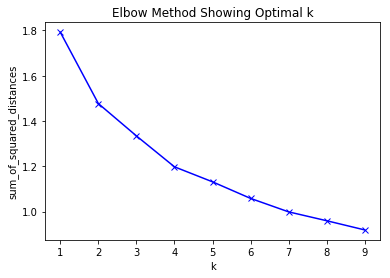

In [35]:
# set number of clusters
k_range = range(1,10)
sum_of_squared_distances = []

# run k-means clustering
for k in k_range:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(data_to_cluster)
    sum_of_squared_distances.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(k_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method Showing Optimal k')
plt.show()

Optimal K found is 4

#### b. Fit model with optimal K found

In [36]:
k_optimal = 4

In [37]:
kmeanModel = KMeans(n_clusters= k_optimal, random_state=0)
kmeanModel.fit(data_to_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Add cluster label to data

In [38]:
# insert the cluster label to data
quarter_venues_sorted.insert(0, 'cluster number', kmeanModel.labels_)

# merge paris_grouped with df_listing to add latitude/longitude for each neighborhood
paris_merged = paris_quarters[['quarter','latitude','longitude']]
paris_merged = paris_merged.join(quarter_venues_sorted.set_index('Quarter'), on='quarter')

paris_merged.head()

,quarter,latitude,longitude,cluster number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Number of 1st Most Common Venue,Number of 2nd Most Common Venue,Number of 3rd Most Common Venue,Number of 4th Most Common Venue,Number of 5th Most Common Venue
0,Saint-Gervais,48.8557,2.3582,1,French Restaurant,Ice Cream Shop,Art Gallery,Art Museum,Plaza,8,4,4,3,3
1,Chaussée-d'Antin,48.8735,2.3323,2,Hotel,French Restaurant,Plaza,Chocolate Shop,Deli / Bodega,13,8,4,2,2
2,Saint-Ambroise,48.8623,2.3761,0,French Restaurant,Cocktail Bar,Coffee Shop,Wine Bar,Pizza Place,12,5,4,4,4
3,Necker,48.8427,2.3108,3,French Restaurant,Hotel,Japanese Restaurant,Bakery,Korean Restaurant,18,9,4,3,3
4,Sainte-Avoie,48.8626,2.3549,1,Japanese Restaurant,Bookstore,French Restaurant,Italian Restaurant,Cocktail Bar,4,4,4,3,3


#### c. Examine each cluster

In [39]:
cluster1 = paris_merged.loc[paris_merged['cluster number'] == 0, paris_merged.columns[[0,1,2,3] + list(range(4, paris_merged.shape[1]))]]
print(cluster1.shape[0], "neighborhood(s) in Cluster 1")
cluster1

23 neighborhood(s) in Cluster 1


,quarter,latitude,longitude,cluster number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Number of 1st Most Common Venue,Number of 2nd Most Common Venue,Number of 3rd Most Common Venue,Number of 4th Most Common Venue,Number of 5th Most Common Venue
2,Saint-Ambroise,48.8623,2.3761,0,French Restaurant,Cocktail Bar,Coffee Shop,Wine Bar,Pizza Place,12,5,4,4,4
6,Folie-Méricourt,48.8674,2.3730,0,French Restaurant,Coffee Shop,Wine Bar,Restaurant,Bar,12,5,4,4,4
7,Saint-Fargeau,48.8710,2.4062,0,French Restaurant,Bar,Bakery,Italian Restaurant,Indian Restaurant,12,6,5,4,4
8,Batignolles,48.8885,2.3139,0,French Restaurant,Bar,Wine Bar,Italian Restaurant,Hotel,10,6,5,4,3
14,Goutte-d'Or,48.8921,2.3555,0,French Restaurant,Bar,Italian Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,12,5,3,3,3
16,La Chapelle,48.8940,2.3644,0,French Restaurant,Bar,Café,Indian Restaurant,Bistro,10,7,4,4,3
26,Parc-de-Montsouris,48.8235,2.3371,0,French Restaurant,Bar,Italian Restaurant,Bakery,Park,16,6,4,4,4
29,Pont-de-Flandre,48.8956,2.3848,0,French Restaurant,Bar,Café,Music Venue,Concert Hall,6,4,3,3,3
34,Combat,48.8786,2.3801,0,French Restaurant,Bar,Park,Cocktail Bar,Restaurant,8,7,4,4,4
40,Saint-Vincent-de-Paul,48.8807,2.3575,0,French Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Bakery,Thai Restaurant,10,5,4,3,3


In [40]:
cluster2 = paris_merged.loc[paris_merged['cluster number'] == 1, paris_merged.columns[[0,1,2,3] + list(range(4, paris_merged.shape[1]))]]
print(cluster2.shape[0], "neighborhood(s) in Cluster 2")
cluster2

32 neighborhood(s) in Cluster 2


,quarter,latitude,longitude,cluster number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Number of 1st Most Common Venue,Number of 2nd Most Common Venue,Number of 3rd Most Common Venue,Number of 4th Most Common Venue,Number of 5th Most Common Venue
0,Saint-Gervais,48.8557,2.3582,1,French Restaurant,Ice Cream Shop,Art Gallery,Art Museum,Plaza,8,4,4,3,3
4,Sainte-Avoie,48.8626,2.3549,1,Japanese Restaurant,Bookstore,French Restaurant,Italian Restaurant,Cocktail Bar,4,4,4,3,3
9,Val-de-Grâce,48.8417,2.3439,1,French Restaurant,Wine Bar,Bakery,Coffee Shop,Ice Cream Shop,10,3,3,3,3
13,Saint-Victor,48.8477,2.3541,1,French Restaurant,Coffee Shop,Plaza,Wine Bar,Ice Cream Shop,9,5,4,4,4
18,Mail,48.8680,2.3447,1,Hotel,French Restaurant,Cocktail Bar,Restaurant,Pedestrian Plaza,7,7,4,3,3
19,Arts-et-Métiers,48.8665,2.3571,1,Wine Bar,Italian Restaurant,Sandwich Place,Japanese Restaurant,Cocktail Bar,5,4,4,4,4
20,Saint-Georges,48.8799,2.3329,1,French Restaurant,Italian Restaurant,Hotel,Bakery,Bistro,10,7,5,5,3
21,Picpus,48.8304,2.4288,1,Bakery,French Restaurant,Hotel,Tennis Stadium,Plaza,3,3,2,2,2
23,Saint-Germain-l'Auxerrois,48.8607,2.3349,1,French Restaurant,Plaza,Hotel,Art Museum,Restaurant,7,7,6,4,4
27,Bel-Air,48.8380,2.4332,1,French Restaurant,Italian Restaurant,Supermarket,Japanese Restaurant,Restaurant,10,6,4,4,4


In [41]:
cluster3 = paris_merged.loc[paris_merged['cluster number'] == 2, paris_merged.columns[[0,1,2,3] + list(range(4, paris_merged.shape[1]))]]
print(cluster3.shape[0], "neighborhood(s) in Cluster 3")
cluster3

7 neighborhood(s) in Cluster 3


,quarter,latitude,longitude,cluster number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Number of 1st Most Common Venue,Number of 2nd Most Common Venue,Number of 3rd Most Common Venue,Number of 4th Most Common Venue,Number of 5th Most Common Venue
1,Chaussée-d'Antin,48.8735,2.3323,2,Hotel,French Restaurant,Plaza,Chocolate Shop,Deli / Bodega,13,8,4,2,2
15,Place-Vendôme,48.8670,2.3286,2,Hotel,Boutique,Plaza,French Restaurant,Art Museum,15,6,5,3,3
17,Vivienne,48.8691,2.3395,2,Hotel,French Restaurant,Cocktail Bar,Restaurant,Plaza,12,4,3,3,3
24,Gaillon,48.8693,2.3334,2,Hotel,Plaza,French Restaurant,Pastry Shop,Historic Site,14,5,5,3,3
39,Champs-Elysées,48.8671,2.3087,2,Hotel,French Restaurant,Garden,Spa,Hotel Bar,15,10,5,3,3
60,Madeleine,48.8713,2.3201,2,Hotel,Boutique,French Restaurant,Gourmet Shop,Garden,15,7,6,4,4
73,Palais-Royal,48.8647,2.3363,2,Hotel,Plaza,French Restaurant,Historic Site,Art Museum,9,7,5,4,3


In [42]:
cluster4 = paris_merged.loc[paris_merged['cluster number'] == 3, paris_merged.columns[[0,1,2,3] + list(range(4, paris_merged.shape[1]))]]
print(cluster4.shape[0], "neighborhood(s) in Cluster 4")
cluster4

18 neighborhood(s) in Cluster 4


,quarter,latitude,longitude,cluster number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Number of 1st Most Common Venue,Number of 2nd Most Common Venue,Number of 3rd Most Common Venue,Number of 4th Most Common Venue,Number of 5th Most Common Venue
3,Necker,48.8427,2.3108,3,French Restaurant,Hotel,Japanese Restaurant,Bakery,Korean Restaurant,18,9,4,3,3
5,Rochechouart,48.8798,2.3449,3,French Restaurant,Italian Restaurant,Bakery,Plaza,Coffee Shop,19,5,3,3,3
10,Europe,48.8781,2.3172,3,French Restaurant,Hotel,Gourmet Shop,Bar,Wine Bar,12,10,4,3,3
11,Plaisance,48.8303,2.3153,3,French Restaurant,Hotel,Bakery,Italian Restaurant,Bar,21,11,4,3,3
12,Porte-Dauphine,48.8718,2.2719,3,French Restaurant,Italian Restaurant,Hotel,Bakery,Art Museum,14,9,7,5,4
22,Grenelle,48.8502,2.2919,3,Hotel,French Restaurant,Gym / Fitness Center,Bakery,Park,12,12,4,4,3
25,Gros-Caillou,48.8583,2.3015,3,French Restaurant,Hotel,Italian Restaurant,Historic Site,Garden,21,8,3,3,3
30,Plaine de Monceaux,48.8850,2.3029,3,French Restaurant,Hotel,Italian Restaurant,Bakery,Restaurant,13,10,7,4,4
32,Invalides,48.8585,2.3164,3,French Restaurant,Garden,Hotel,Historic Site,Art Museum,15,10,6,5,4
33,Ecole-Militaire,48.8504,2.3110,3,French Restaurant,Hotel,Italian Restaurant,Garden,Historic Site,17,9,4,4,3


#### d. Name the clusters

Cluster 1 could be "Restaurant & Bar"

Cluster 2 could be "Diverse Entertainment"

Cluster 3 could be "Lots of Hotel"

Cluster 4 could be "Hotel & French/Italian Food"

#### f. Input cluster names and define label for graphing later

In [43]:
# Input cluster names
cluster_name = []
cluster_name.clear()

for i in range(0,len(paris_merged['quarter'])):
    if paris_merged['cluster number'][i] == 0:
        cluster_name.append('Restaurant & Bar')
    elif paris_merged['cluster number'][i] == 1:
        cluster_name.append('Diverse Entertainment')
    elif paris_merged['cluster number'][i] == 2:
        cluster_name.append('Lots of Hotel')
    else :
        cluster_name.append('Hotel & French/Italian Food')

paris_merged.insert(3, 'cluster name', cluster_name)
paris_merged.head()

,quarter,latitude,longitude,cluster name,cluster number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Number of 1st Most Common Venue,Number of 2nd Most Common Venue,Number of 3rd Most Common Venue,Number of 4th Most Common Venue,Number of 5th Most Common Venue
0,Saint-Gervais,48.8557,2.3582,Diverse Entertainment,1,French Restaurant,Ice Cream Shop,Art Gallery,Art Museum,Plaza,8,4,4,3,3
1,Chaussée-d'Antin,48.8735,2.3323,Lots of Hotel,2,Hotel,French Restaurant,Plaza,Chocolate Shop,Deli / Bodega,13,8,4,2,2
2,Saint-Ambroise,48.8623,2.3761,Restaurant & Bar,0,French Restaurant,Cocktail Bar,Coffee Shop,Wine Bar,Pizza Place,12,5,4,4,4
3,Necker,48.8427,2.3108,Hotel & French/Italian Food,3,French Restaurant,Hotel,Japanese Restaurant,Bakery,Korean Restaurant,18,9,4,3,3
4,Sainte-Avoie,48.8626,2.3549,Diverse Entertainment,1,Japanese Restaurant,Bookstore,French Restaurant,Italian Restaurant,Cocktail Bar,4,4,4,3,3


In [44]:
# Input point label
point_labels = []
point_labels.clear()

for i in range(0,len(paris_merged['quarter'])):
    point_label = ( str(paris_merged['Number of 1st Most Common Venue'][i]) + ' ' + paris_merged['1st Most Common Venue'][i] + ', '
                   + str(paris_merged['Number of 2nd Most Common Venue'][i]) + ' ' + paris_merged['2nd Most Common Venue'][i] + ', '
                   + str(paris_merged['Number of 3rd Most Common Venue'][i]) + ' ' + paris_merged['3rd Most Common Venue'][i] )
    point_labels.append(point_label)

paris_merged.insert(4,'point label',point_labels)
paris_merged.head()

,quarter,latitude,longitude,cluster name,point label,cluster number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Number of 1st Most Common Venue,Number of 2nd Most Common Venue,Number of 3rd Most Common Venue,Number of 4th Most Common Venue,Number of 5th Most Common Venue
0,Saint-Gervais,48.8557,2.3582,Diverse Entertainment,"8 French Restaurant, 4 Ice Cream Shop, 4 Art G...",1,French Restaurant,Ice Cream Shop,Art Gallery,Art Museum,Plaza,8,4,4,3,3
1,Chaussée-d'Antin,48.8735,2.3323,Lots of Hotel,"13 Hotel, 8 French Restaurant, 4 Plaza",2,Hotel,French Restaurant,Plaza,Chocolate Shop,Deli / Bodega,13,8,4,2,2
2,Saint-Ambroise,48.8623,2.3761,Restaurant & Bar,"12 French Restaurant, 5 Cocktail Bar, 4 Coffee...",0,French Restaurant,Cocktail Bar,Coffee Shop,Wine Bar,Pizza Place,12,5,4,4,4
3,Necker,48.8427,2.3108,Hotel & French/Italian Food,"18 French Restaurant, 9 Hotel, 4 Japanese Rest...",3,French Restaurant,Hotel,Japanese Restaurant,Bakery,Korean Restaurant,18,9,4,3,3
4,Sainte-Avoie,48.8626,2.3549,Diverse Entertainment,"4 Japanese Restaurant, 4 Bookstore, 4 French R...",1,Japanese Restaurant,Bookstore,French Restaurant,Italian Restaurant,Cocktail Bar,4,4,4,3,3


## III. Visualize in a map

### 1. Draw the map of Paris

In [45]:
!conda install -c conda-forge folium --yes 
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Asus\Anaconda3

  added / updated specs:
    - folium


The following packages will be UPDATED:

  ca-certificates     anaconda::ca-certificates-2019.5.15-1 --> conda-forge::ca-certificates-2019.9.11-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                          anaconda --> conda-forge
  conda                                            anaconda --> conda-forge
  openssl                anaconda::openssl-1.1.1-he774522_0 --> conda-forge::openssl-1.1.1c-hfa6e2cd_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Rolling back transaction: ...working... done


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Asus\Anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)
ERROR conda.core.link:_execute(700): An error occurred while installing package 'conda-forge::openssl-1.1.1c-hfa6e2cd_0'.
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Asus\Anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)

[Errno 13] Permission denied: 'C:\\Users\\Asus\\Anaconda3\\Library\\bin\\libssl-1_1-x64.dll'
()



Folium installed and imported!


Let's get the latitude and longitude of Paris

In [46]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Asus\Anaconda3

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  ca-certificates     anaconda::ca-certificates-2019.5.15-1 --> conda-forge::ca-certificates-2019.9.11-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                          anaconda --> conda-forge
  conda                                            anaconda --> conda-forge
  openssl                anaconda::openssl-1.1.1-he774522_0 --> conda-forge::openssl-1.1.1c-hfa6e2cd_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Rolling back transaction: ...working... done


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Asus\Anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)
ERROR conda.core.link:_execute(700): An error occurred while installing package 'conda-forge::openssl-1.1.1c-hfa6e2cd_0'.
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Asus\Anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)

[Errno 13] Permission denied: 'C:\\Users\\Asus\\Anaconda3\\Library\\bin\\libssl-1_1-x64.dll'
()



In [47]:
address = 'Paris, France' 

geolocator = Nominatim(user_agent="my-application", timeout=10)
paris_location = geolocator.geocode(address)

print('The geograpical coordinate of Paris, France are {}, {}.'.format(paris_location.latitude, paris_location.longitude))

The geograpical coordinate of Paris, France are 48.8566101, 2.3514992.


Now draw the map

In [48]:
paris_map = folium.Map(location=[paris_location.latitude,paris_location.longitude], zoom_start=12)
paris_map

### 2. Draw choropleth map with price per night 

Import libraries

In [49]:
!conda install -c conda-forge geojson --yes
import geojson

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Asus\Anaconda3

  added / updated specs:
    - geojson


The following packages will be UPDATED:

  ca-certificates     anaconda::ca-certificates-2019.5.15-1 --> conda-forge::ca-certificates-2019.9.11-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                          anaconda --> conda-forge
  conda                                            anaconda --> conda-forge
  openssl                anaconda::openssl-1.1.1-he774522_0 --> conda-forge::openssl-1.1.1c-hfa6e2cd_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Rolling back transaction: ...working... done


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Asus\Anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)
ERROR conda.core.link:_execute(700): An error occurred while installing package 'conda-forge::openssl-1.1.1c-hfa6e2cd_0'.
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Asus\Anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)

[Errno 13] Permission denied: 'C:\\Users\\Asus\\Anaconda3\\Library\\bin\\libssl-1_1-x64.dll'
()



In [50]:
#!conda install -c anaconda wget --yes
import wget

First, let's get the geodata of the neighborhoods by reading the geoJSON file from [Inside Airbnb website](http://insideairbnb.com/get-the-data.html)

In [51]:
wget.download('http://data.insideairbnb.com/france/ile-de-france/paris/2019-07-09/visualisations/neighbourhoods.geojson')

'neighbourhoods.geojson'

In [52]:
test = pd.read_json('neighbourhoods.geojson')

for i in range(0,len(test['features'])):
    print(test['features'][i]['properties']['neighbourhood'])

Batignolles-Monceau
Palais-Bourbon
Buttes-Chaumont
Opéra
Entrepôt
Gobelins
Vaugirard
Reuilly
Louvre
Luxembourg
Élysée
Temple
Ménilmontant
Panthéon
Passy
Observatoire
Popincourt
Bourse
Buttes-Montmartre
Hôtel-de-Ville


In [53]:
import codecs
with codecs.open('neighbourhoods.geojson',encoding='utf-8') as f:
    test = pd.read_json(f)
#for i in range(0,len(test['features'])):
    #print(test['features'][i]['properties']['neighbourhood'])

Set up the bin intervals and draw the map

In [54]:
bin_intervals = [70,100,130,160,190]

paris_map.choropleth(geo_data = 'neighbourhoods.geojson',
           data = df_listing,
           name = 'Airbnb listing in Paris',
           columns = ['neighbourhood','average price per night'],
           key_on ='feature.properties.neighbourhood',
           fill_color='YlGn',
           fill_opacity=0.6,
           line_opacity=0.4,
           bins = bin_intervals,
           legend_name = 'Airbnb listing price per night')

paris_map

C:\Users\Asus\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 3. Add the quarter clustered to map

In [55]:
#set color scheme for the clusters
x = np.arange(k_optimal + 1)
ys = [i + x + (i*x)**2 for i in range(k_optimal + 1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers to the map
#markers_colors = []
for lat, lon, quart, no, name, point in zip(paris_merged['latitude'],
                                            paris_merged['longitude'], 
                                            paris_merged['quarter'],
                                            paris_merged['cluster number'],
                                            paris_merged['cluster name'],
                                            paris_merged['point label']):
    label = '{} / {} / {}'.format(quart, name, point)
    label = folium.Popup(label, max_width=450, min_width=450, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(no)-1],
        fill=True,
        fill_color=rainbow[int(no)-1],
        fill_opacity=0.9).add_to(paris_map)
       
paris_map

## <center> This is the end of project </center>